## Erste Analysen und Visualisierungen

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 1](https://data-science.training/kapitel-1/)
* Datum: 23.03.2023

In diesem dritten Notebook verwenden wir Funktionen zur Analyse von Daten und zur Erstellung von Grafiken.<br>
Wir orientieren uns dabei wieder am KNIME Workflow und "bilden" die verwendeten Knoten in Python nach. Die Namen der KNIME-Knoten sind deshalb auch wieder angegeben.

(A) Daten analysieren und visualisieren

1. Statistics: Schnelle statistische Analyse der Daten inklusive Histogramme.

2. Pie Chart: Tortendiagramm (für Werte, die sich zu 100% addieren). 


(B) Spezielle Analysen und Berechnungen:

3. Value Counter: Hiermit werden die Anzahl der Werte eines Attributs gezählt.

4. Linear Correlation: Hiermit können wir lineare Korrelationen (Beziehungen) zwischen Attributen analysieren.


In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# NumPy Paket (Package) importieren
#  Mehrdimensionale Datenstrukturen (Vektoren, Matrizen, Tensoren, Arrays), Lineare Algebra
#  https://numpy.org/doc/
import numpy as np
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt

In [5]:
# Trainingsdaten als Pandas Data Frame (df) aus CSV-Datei laden
#  (KNIME: "CSV Reader")
df = pd.read_csv('../../data/titanic/original/train.csv')

In [6]:
# Statistische Informationen
#  (KNIME: "Statistics")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Fehlende Werte
#  (KNIME: "Statistics")
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

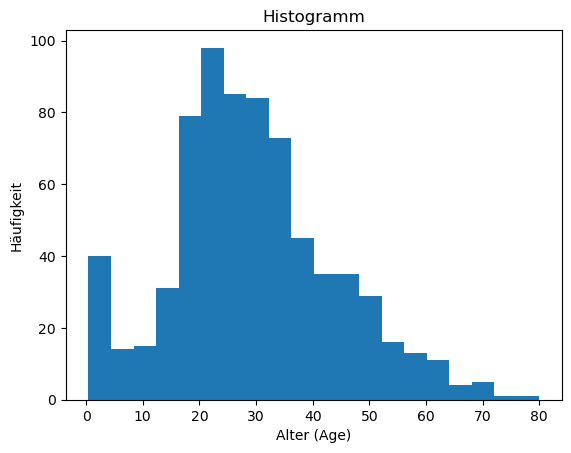

In [8]:
# Histogramm erstellen
#  (KNIME: "Statistics")
#  z.B. für das Attribut Age
plt.hist(df['Age'], bins=20) # 20 Klassen (Bins)
# Überschrift und Achsenbeschriftungen
plt.title('Histogramm')
plt.xlabel('Alter (Age)')
plt.ylabel('Häufigkeit')
# Grafik ausgeben
plt.show()

In [9]:
# Verteilung der Werte prüfen (d.h. berechnen und ausgeben)
#  (KNIME: "Value Counter")
count_class = df['Survived'].value_counts()
print(count_class)

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: ylabel='count'>

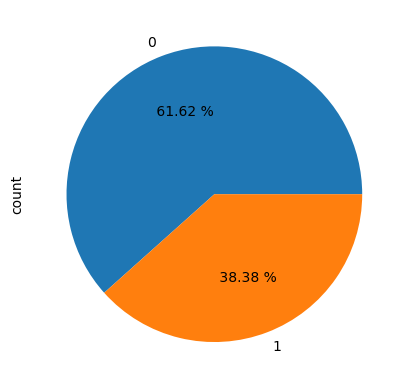

In [10]:
# Tortendiagramm (Pie Chart) erstellen
#  (KNIME "Pie Chart")
count_class.plot(kind='pie', autopct='%6.2f %%')

In [11]:
# Korrelationskoeffizienten berechnen
#  (KNIME "Linear Correlation")
#
# Filter: Nur numerische Attribute
df1 = df.select_dtypes(include=[np.number])
# Korrelationsmatrix
corr_matrix = df1.corr(method='pearson')
display(corr_matrix)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


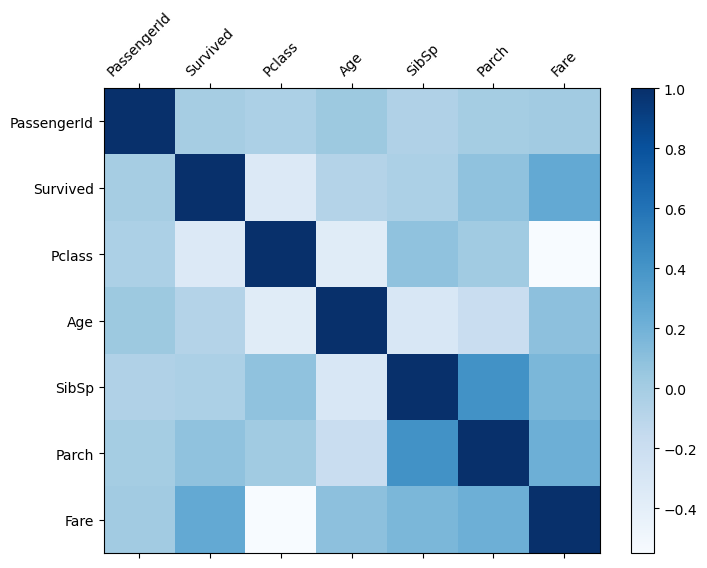

In [12]:
# Heatmap mit Korrelationskoeffizienten
#  (KNIME: "Linear Correlation")
#
# Größe der Grafik festlegen
plt.figure(figsize=(8,6))
# Korrelationsmaxtrix mit Farbpalette "Blues"
plt.matshow(corr_matrix, cmap='Blues', fignum=1, aspect='auto')
# Ticks mit Beschriftungen, X-Labels um 45 Grad gedreht 
plt.xticks(range(len(df1.columns)), df1.columns, rotation=45)
plt.yticks(range(len(df1.columns)), df1.columns)
# Farbskala
plt.colorbar()
# Grafik ausgeben
plt.show()